# RGI01 (Alaska)

F. Maussion & S. Galos

Equivalent to RGI6, except:
- in Kenai where we use a new inventory
- a group of glaciers we forgot in previous versions
- Northernmost glacier

In [1]:
import pandas as pd
import geopandas as gpd
import subprocess
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
from utils import mkdir, submission_summary, needs_size_filter, size_filter, plot_map, plot_date_hist, find_duplicates, open_zip_shapefile, correct_geoms
import os

In [2]:
# Region of interest
reg = 1

# go down from rgi7_scripts/workflow
data_dir = '../../rgi7_data/'

# Level 2 GLIMS files
l2_dir = os.path.join(data_dir, 'l2_sel_reg_tars')

# Output directories
output_dir = mkdir(os.path.join(data_dir, 'l3_rgi7a'))
output_dir_tar = mkdir(os.path.join(data_dir, 'l3_rgi7a_tar'))

# RGI v6 file for comparison later 
rgi6_reg_file = os.path.join(data_dir, 'l0_RGIv6', '01_rgi60_Alaska.zip')

In [3]:
# Read L2 files
shp = gpd.read_file('tar://' + os.path.join(l2_dir, f'RGI{reg:02d}.tar.gz/RGI{reg:02d}/RGI{reg:02d}.shp'))

In [4]:
# Specific to this region: boxes where data has to be selected differently
support_dir = os.path.join(data_dir, 'l0_support_data')

### List of submissions 

In [5]:
sdf, df_class = submission_summary(shp)
# There are loads of small submissions in this region
sdf.loc[sdf.N > 1]

,N,A,analysts,submitters,release_date,geog_area,src_date_mode,src_date_min,src_date_max
subm_id,,,,,,,,,
324,36,112.5,Beedle,Beedle,2006,Various (NSIDC),2001,2001,2001
434,2,3629.6,Beedle,Beedle,2007,Various (NSIDC),2001,2001,2001
457,2,126.2,Beedle,Beedle,2007,Various (NSIDC),2001,2001,2001
458,2,359.0,Beedle,Beedle,2007,Various (NSIDC),2001,2001,2001
539,311,1240.1,Manley,Racoviteanu,2009,Alaska,1954,1948,1954
541,116,5207.2,Herreid,Arendt,2010,Alaska,2007,2007,2007
543,310,1675.9,Herreid,Arendt,2010,Alaska,2005,2005,2005
551,779,3829.1,Herreid,Arendt,2011,Alaska,2003,2003,2003
620,8827,16219.0,"Frey, Le Bris, Paul",Paul,2010,Various (GlobGlacier),2007,2005,2009


In [6]:
# # Optional: write out selection in intermediate shape files for manual GIS review
# tmp_output_dir = mkdir(os.path.join(data_dir, 'l0_tmp_data', f'rgi{reg:02d}_inventories'))
# tmp_output_dir_tar = mkdir(os.path.join(data_dir, 'l0_tmp_data'))
# for subid in shp.subm_id.unique():
#     s_loc = shp.loc[shp.subm_id == subid]
#     s_loc.to_file(tmp_output_dir + f'/subm_{int(subid):03d}.shp')
# print('Taring...')
# print(subprocess.run(['tar', '-zcvf', f'{tmp_output_dir_tar}/rgi{reg:02d}_inventories.tar.gz', '-C', 
#                       os.path.join(data_dir, 'l0_tmp_data'), f'rgi{reg:02d}_inventories']))

## Outline selection 

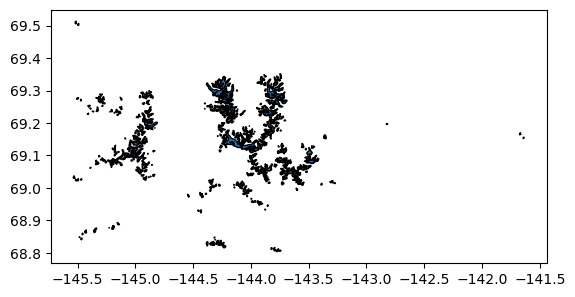

In [7]:
# This are two north glaciers (Paul) + some outline corrections
paul = shp.loc[shp.subm_id.isin([810])].copy()
paul['is_rgi6'] = False
paul.plot(edgecolor='k');

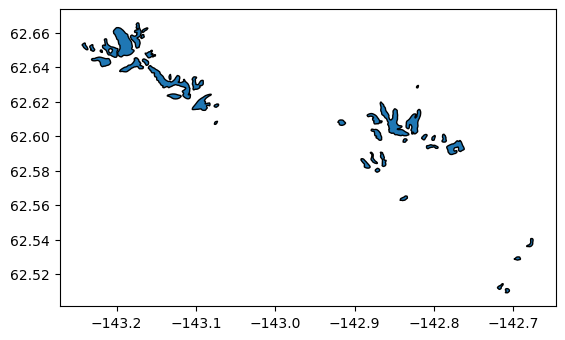

In [8]:
# This is a small group of glaciers (McNabb)
mcnabb = shp.loc[shp.subm_id.isin([766])].copy()
mcnabb['is_rgi6'] = False
mcnabb.plot(edgecolor='k');

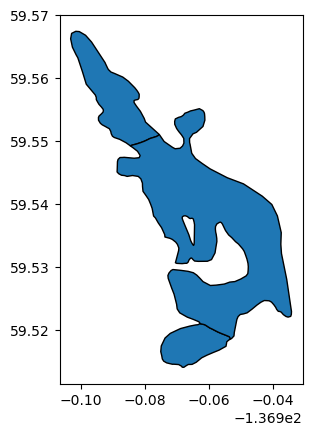

In [9]:
# This is the corrected outline in GLIMS
shp.loc[shp.subm_id.isin([756])].plot(edgecolor='k');

# This was the outline Bruce thought was ok - but it was not OK https://trello.com/c/9yUMSONP/186-new-missing-geometry-in-alaska
# shp.loc[shp.anlys_id.isin([373863])].plot(edgecolor='k');

In [10]:
# 756 is for the corrected outline
rgi6 = shp.loc[shp.subm_id.isin([624, 756])].copy()

# Nothing should change here
rgi6['is_rgi6'] = True

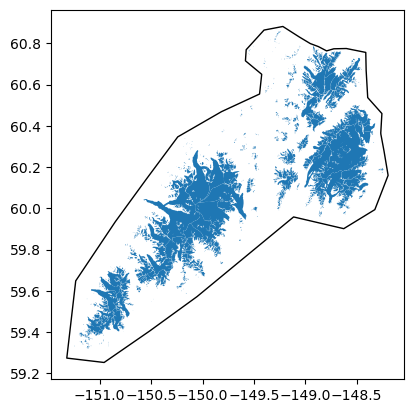

In [11]:
# Read Kenai box
shp_loc = open_zip_shapefile(support_dir + f'/kenai.zip')

kenai = shp.loc[shp.subm_id.isin([809])].copy()
kenai['is_rgi6'] = False 

ax = shp_loc.plot(facecolor='none');
kenai.plot(ax=ax);

In [12]:
# Remove Kenai from rgi6
print(len(rgi6))
rp = rgi6.representative_point().to_frame('geometry')
rp['orig_index'] = rgi6.index
intersect = gpd.overlay(rp, shp_loc, how='difference')
rgi6_sel = rgi6.loc[intersect['orig_index'].values].copy()
print(len(rgi6_sel))

26773
25308


In [13]:
rgi7 = pd.concat([rgi6_sel, kenai, mcnabb, paul])

In [14]:
# Size filter?
print(len(rgi7))
rgi7 = size_filter(rgi7)
len(rgi7)

27536


27511

### Some sanity checks 

In [15]:
sdf, df_class = submission_summary(rgi7)
df_class

,N,N NA
subm_id,,
624,25305,25305
756,3,3
809,1737,1737
766,42,42
810,424,424


In [16]:
# Check the orphaned rock outcrops
orphan_f = os.path.join(data_dir, 'l1_orphan_interiors', f'RGI{reg:02d}', f'RGI{reg:02d}.shp')
if os.path.exists(orphan_f):
    orphan_f = gpd.read_file(orphan_f)
    if np.any(np.isin(rgi7.subm_id.unique(), orphan_f.subm_id.unique())):
        print('Orphan rock outcrops detected.')

In [17]:
rgi7 = correct_geoms(rgi7)

Found 775 invalid geometries out of 27511. Correcting...
After correction, 0 geometries are still invalid.
Area changed by -1001.4 m2 (-0.0000%)


In [18]:
find_duplicates(rgi7);

Seems Okay!


In [30]:
needs_size_filter(rgi7)

False

### Plots 

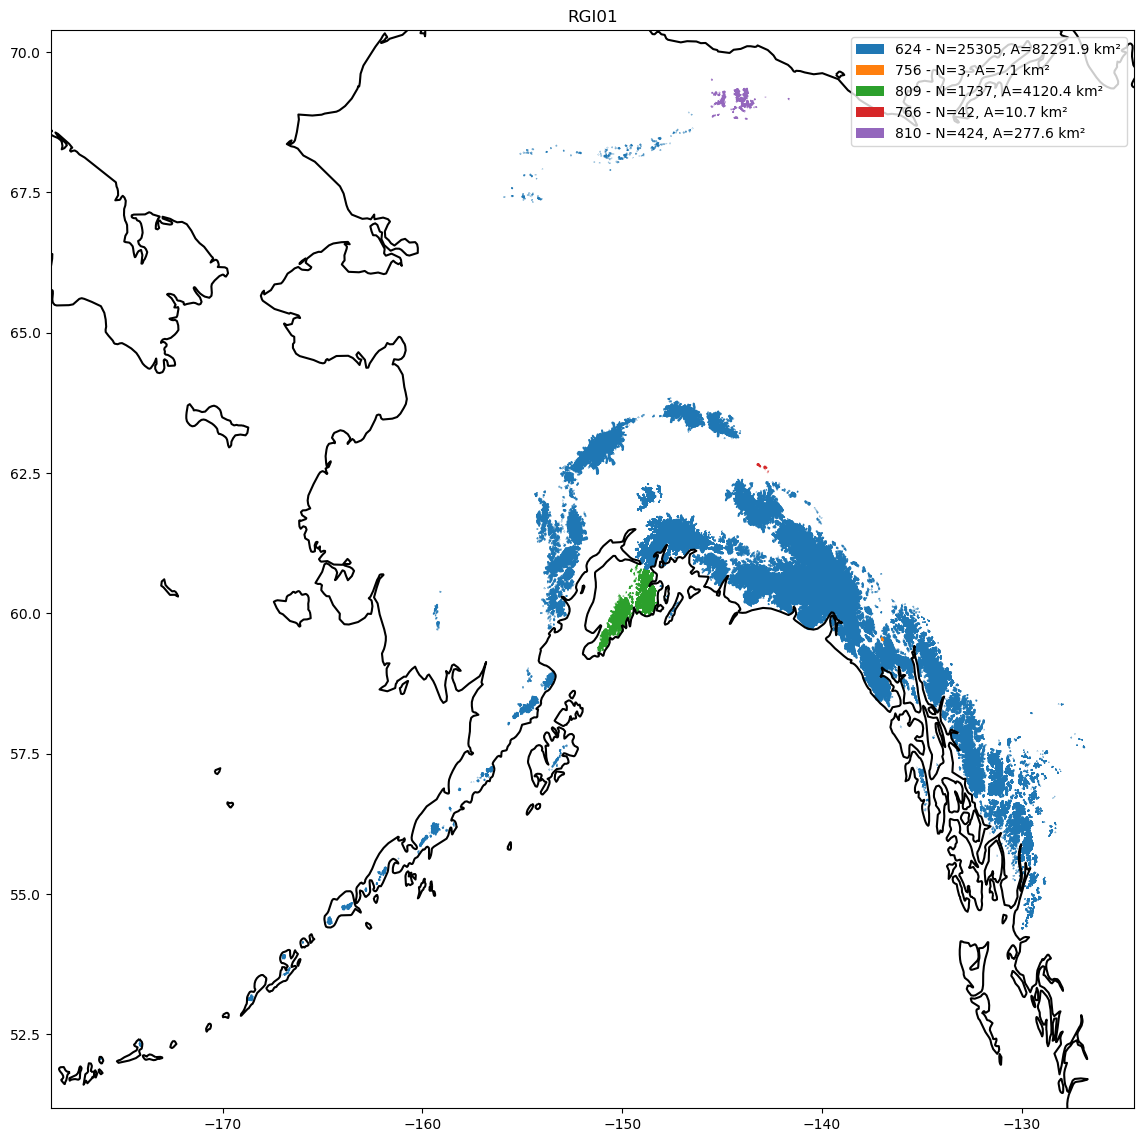

In [19]:
plot_map(rgi7, reg)

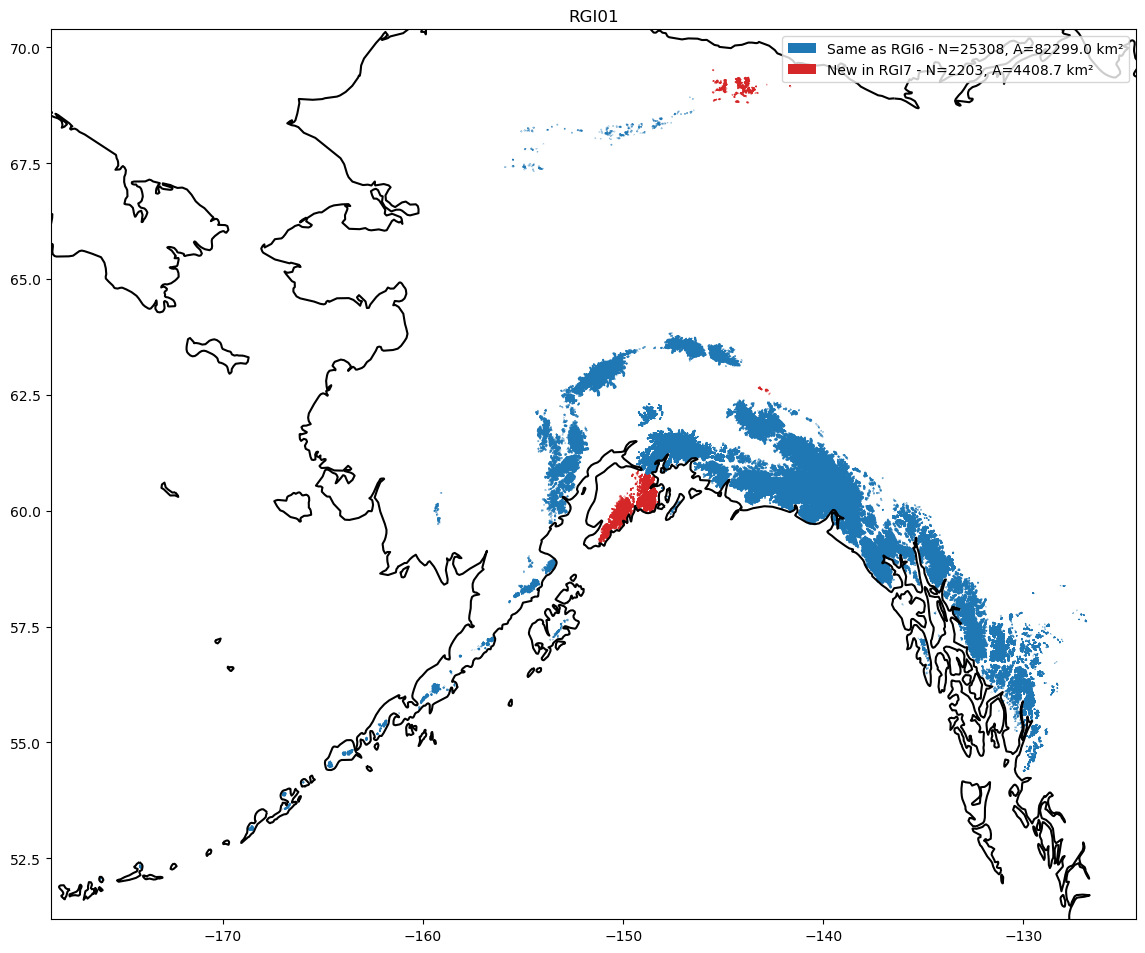

In [20]:
plot_map(rgi7, reg, is_rgi6=True)

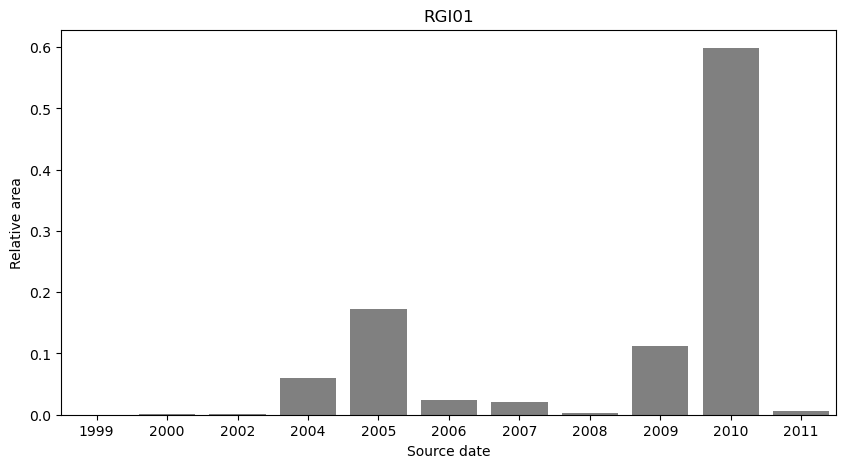

In [21]:
plot_date_hist(rgi7, reg)

### Text for github

In [22]:
fgh = sdf.T
fgh

subm_id,624,756,809,766,810
N,25305,3,1737,42,424
A,82291.9,7.1,4120.4,10.7,277.6
analysts,"Beedle, Berthier, Bolch, Burgess, Cogley, Fors...","Beedle, Berthier, Bolch, Burgess, Cogley, Fors...","Paul, Yang",McNabb,"Beedle, Berthier, Bolch, Burgess, Cogley, Fors..."
submitters,Cogley,Bolch,Yang,McNabb,Paul
release_date,2015,2021,2022,2020,2023
geog_area,Randolph Glacier Inventory; Umbrella RC for me...,Randolph Glacier Inventory; Umbrella RC for me...,Kenai Peninsula,Alaska,Randolph Glacier Inventory; Umbrella RC for me...
src_date_mode,2010,2010,2005,1999,2007
src_date_min,2000,2010,2005,1999,2000
src_date_max,2011,2010,2007,1999,2007


In [23]:
print(fgh.to_markdown(headers=np.append(['subm_id'], fgh.columns)))

| subm_id       | 624                                                                                       | 756                                                                                       | 809             | 766    | 810                                                                                             |
|:--------------|:------------------------------------------------------------------------------------------|:------------------------------------------------------------------------------------------|:----------------|:-------|:------------------------------------------------------------------------------------------------|
| N             | 25305                                                                                     | 3                                                                                         | 1737            | 42     | 424                                                                                             |
| A             | 8

In [24]:
fgh

subm_id,624,756,809,766,810
N,25305,3,1737,42,424
A,82291.9,7.1,4120.4,10.7,277.6
analysts,"Beedle, Berthier, Bolch, Burgess, Cogley, Fors...","Beedle, Berthier, Bolch, Burgess, Cogley, Fors...","Paul, Yang",McNabb,"Beedle, Berthier, Bolch, Burgess, Cogley, Fors..."
submitters,Cogley,Bolch,Yang,McNabb,Paul
release_date,2015,2021,2022,2020,2023
geog_area,Randolph Glacier Inventory; Umbrella RC for me...,Randolph Glacier Inventory; Umbrella RC for me...,Kenai Peninsula,Alaska,Randolph Glacier Inventory; Umbrella RC for me...
src_date_mode,2010,2010,2005,1999,2007
src_date_min,2000,2010,2005,1999,2000
src_date_max,2011,2010,2007,1999,2007


## Write out and tar 

In [25]:
dd = mkdir(f'{output_dir}/RGI{reg:02d}/', reset=True)

print('Writing...')
rgi7.to_file(dd + f'RGI{reg:02d}.shp')

print('Taring...')
print(subprocess.run(['tar', '-zcvf', f'{output_dir_tar}/RGI{reg:02d}.tar.gz', '-C', output_dir, f'RGI{reg:02d}']))

Writing...
Taring...
RGI01/
RGI01/RGI01.prj
RGI01/RGI01.cpg
RGI01/RGI01.shx
RGI01/RGI01.dbf
RGI01/RGI01.shp
CompletedProcess(args=['tar', '-zcvf', '../../rgi7_data/l3_rgi7a_tar/RGI01.tar.gz', '-C', '../../rgi7_data/l3_rgi7a', 'RGI01'], returncode=0)


## Consistency check with RGI6 

In [26]:
# load reference data
from utils import open_zip_shapefile
rgi6 = open_zip_shapefile(rgi6_reg_file)

In [27]:
len(rgi7), len(rgi6)

(27511, 27108)

OK yeah the numbers changed for the new inventories.

Test the areas:

In [28]:
rgi6['Area_us'] = rgi6.to_crs({'proj':'cea'}).area 

In [29]:
print('Area RGI7a (km2)', rgi7['area'].sum() * 1e-6)
print('Area RGI6 (km2)', rgi6['Area'].sum())
print('Area RGI6 computed by us (km2)', rgi6['Area_us'].sum() * 1e-6)
print('diff areas RGI6 - RGI7 computed by us (km2)', (rgi6['Area_us'].sum() - rgi7['area'].sum()) * 1e-6)

Area RGI7a (km2) 86707.66395126095
Area RGI6 (km2) 86725.053
Area RGI6 computed by us (km2) 86724.97380315595
diff areas RGI6 - RGI7 computed by us (km2) 17.30985189500427


Small diffs due to new inventories

### The code below is now obsolete! GLIMS issue fixed 

### Find the missing glacier 

In [30]:
df_ref = rgi6.copy()
df_ref['area'] = rgi6['Area_us'] 

In [31]:
import progressbar

In [32]:
def xy_coord(geom):
    """To compute CenLon CenLat ourselves"""
    x, y = geom.xy
    return x[0], y[0]

In [33]:
# compute CenLon CenLat ourselves
rp = df_ref.representative_point()

coordinates = np.array(list(rp.apply(xy_coord)))
df_ref['CenLon'] = coordinates[:, 0]
df_ref['CenLat'] = coordinates[:, 1]

In [34]:
df_ref_orig = df_ref.copy()

In [35]:
# Loop over all RGI7 glaciers and find their equivalent in ref
df_ref = df_ref_orig.copy()
not_found = {}
to_drop = []
for i, (ref_area, lon, lat) in progressbar.progressbar(enumerate(zip(rgi7['area'].values, rgi7.CenLon.values, rgi7.CenLat.values)), max_value=len(rgi7)):
#     dist = haversine(lon, lat, df_ref.CenLon.values, df_ref.CenLat.values)
    dist = (lon - df_ref.CenLon.values)**2 + (lat - df_ref.CenLat.values)**2 
    found = False
    for j in np.argsort(dist)[:10]:
        s6 = df_ref.iloc[j]
        if np.allclose(s6['area'], ref_area, rtol=0.001):
            found = True
            to_drop.append(s6.name)
            break
    if not found:
        not_found[i] = df_ref.iloc[np.argsort(dist)[:10]]
    if len(to_drop) > 1000:
        df_ref.drop(labels=to_drop, inplace=True)
        to_drop = []
df_ref.drop(labels=to_drop, inplace=True)

100% (27511 of 27511) |##################| Elapsed Time: 0:00:29 Time:  0:00:29


In [36]:
print(len(not_found), len(df_ref))

1519 1117


In [37]:
df_ref

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry,Area_us,area
1861,RGI60-01.01862,G216235E69309N,20070828,-9999999,-143.769815,69.309029,1,1,1.716,1725,...,0,0,0,0,9,9,None,"POLYGON ((-143.74269 69.31953, -143.74142 69.3...",1.716017e+06,1.716017e+06
1862,RGI60-01.01863,G216123E69320N,20070828,-9999999,-143.876974,69.320829,1,1,0.348,1705,...,0,0,0,0,9,9,None,"POLYGON ((-143.87702 69.31651, -143.87832 69.3...",3.476041e+05,3.476041e+05
1863,RGI60-01.01864,G216268E69305N,20070828,-9999999,-143.732943,69.304774,1,1,0.342,1821,...,0,0,0,0,9,9,None,"POLYGON ((-143.72678 69.30829, -143.72514 69.3...",3.417769e+05,3.417769e+05
1865,RGI60-01.01866,G214686E69275N,20070828,-9999999,-145.314003,69.275127,1,1,1.082,1612,...,0,0,0,0,9,9,None,"POLYGON ((-145.30244 69.26866, -145.30436 69.2...",1.081586e+06,1.081586e+06
1867,RGI60-01.01868,G215108E69265N,20070828,-9999999,-144.893461,69.265517,1,1,0.440,1659,...,0,0,0,0,9,9,None,"POLYGON ((-144.89189 69.26120, -144.89352 69.2...",4.397878e+05,4.397878e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26800,RGI60-01.26805,G210150E59778N,20050720,-9999999,-149.851351,59.777684,1,4,0.317,667,...,0,0,0,0,9,9,None,"POLYGON ((-149.84646 59.78075, -149.84608 59.7...",3.166144e+05,3.166144e+05
26802,RGI60-01.26807,G211109E60152N,20060912,-9999999,-148.898817,60.156747,1,4,1.981,618,...,0,0,0,0,9,9,None,"POLYGON ((-148.88813 60.14853, -148.88812 60.1...",1.980559e+06,1.980559e+06
26803,RGI60-01.26808,G211113E60664N,20060912,-9999999,-148.887359,60.663581,1,4,0.184,1052,...,0,0,0,0,9,9,None,"POLYGON ((-148.88912 60.66551, -148.88749 60.6...",1.843645e+05,1.843645e+05
26992,RGI60-01.26997,G210195E59733N,20050720,-9999999,-149.805027,59.733293,1,4,0.059,764,...,0,0,0,0,9,9,None,"POLYGON ((-149.80818 59.73388, -149.80773 59.7...",5.912032e+04,5.912032e+04


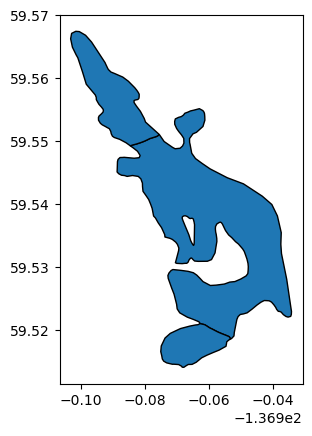

In [38]:
rgi6.loc[rgi6.RGIId.isin(['RGI60-01.20630', 'RGI60-01.25912', 'RGI60-01.25913'])].plot(edgecolor='k');

In [39]:
pb_rgi7 = rgi7.iloc[list(not_found.keys())]

In [ ]:
pb_rgi7

,line_type,anlys_id,glac_id,anlys_time,area,db_area,width,length,primeclass,min_elev,...,loc_unc_x,loc_unc_y,glob_unc_x,glob_unc_y,submitters,analysts,CenLon,CenLat,geometry,is_rgi6
51709,glac_bound,1010097.0,G208754E59332N,2022-12-10T00:00:00,59907.693048,0.059908,0.0,0.0,0.0,0.0,...,50,50,80,80,"Yang, Ruitang","Paul, Frank; Yang, Ruitang",-151.244510,59.331741,"POLYGON Z ((-151.24390 59.33304 0.00000, -151....",False
51710,glac_bound,1010098.0,G208799E59387N,2022-12-10T00:00:00,19913.706879,0.019914,0.0,0.0,0.0,0.0,...,50,50,80,80,"Yang, Ruitang","Paul, Frank; Yang, Ruitang",-151.200327,59.386724,"POLYGON Z ((-151.20134 59.38745 0.00000, -151....",False
51711,glac_bound,1010099.0,G208804E59355N,2022-12-10T00:00:00,19642.078944,0.019642,0.0,0.0,0.0,0.0,...,50,50,80,80,"Yang, Ruitang","Paul, Frank; Yang, Ruitang",-151.195728,59.354639,"POLYGON Z ((-151.19868 59.35435 0.00000, -151....",False
51712,glac_bound,1010100.0,G208805E59385N,2022-12-10T00:00:00,33894.699758,0.033895,0.0,0.0,0.0,0.0,...,50,50,80,80,"Yang, Ruitang","Paul, Frank; Yang, Ruitang",-151.194062,59.384860,"POLYGON Z ((-151.19524 59.38556 0.00000, -151....",False
51713,glac_bound,1010101.0,G208807E59354N,2022-12-10T00:00:00,31811.613852,0.031812,0.0,0.0,0.0,0.0,...,50,50,80,80,"Yang, Ruitang","Paul, Frank; Yang, Ruitang",-151.187859,59.353246,"POLYGON Z ((-151.18835 59.35427 0.00000, -151....",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53890,glac_bound,1012278.0,G216705E69019N,2023-01-08T00:00:00,274828.096629,0.274828,0.0,0.0,0.0,1850.0,...,50,50,80,80,"Paul, Frank","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...",-143.296429,69.019548,"POLYGON Z ((-143.29510 69.01654 0.00000, -143....",False
53891,glac_bound,1012279.0,G216724E69015N,2023-01-08T00:00:00,89572.247649,0.089572,0.0,0.0,0.0,1871.0,...,50,50,80,80,"Paul, Frank","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...",-143.275844,69.014759,"POLYGON Z ((-143.28019 69.01528 0.00000, -143....",False
53892,glac_bound,1012280.0,G217177E69196N,2023-01-08T00:00:00,87953.746493,0.087954,0.0,0.0,0.0,1732.0,...,50,50,80,80,"Paul, Frank","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...",-142.822247,69.196724,"POLYGON Z ((-142.82575 69.19744 0.00000, -142....",False
53893,glac_bound,1012281.0,G218330E69167N,2023-01-08T00:00:00,112882.835813,0.112883,0.0,0.0,0.0,0.0,...,50,50,80,80,"Paul, Frank","Beedle, Matthew; Berthier, Etienne; Bolch, Tob...",-141.670274,69.166921,"POLYGON Z ((-141.67091 69.16956 0.00000, -141....",False


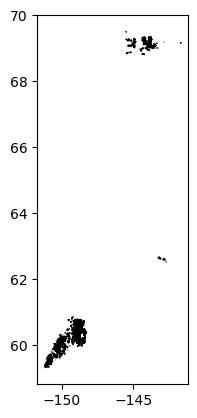

In [41]:
pb_rgi7.plot(edgecolor='k');

In [42]:
df_ref

,RGIId,GLIMSId,BgnDate,EndDate,CenLon,CenLat,O1Region,O2Region,Area,Zmin,...,Status,Connect,Form,TermType,Surging,Linkages,Name,geometry,Area_us,area
1861,RGI60-01.01862,G216235E69309N,20070828,-9999999,-143.769815,69.309029,1,1,1.716,1725,...,0,0,0,0,9,9,None,"POLYGON ((-143.74269 69.31953, -143.74142 69.3...",1.716017e+06,1.716017e+06
1862,RGI60-01.01863,G216123E69320N,20070828,-9999999,-143.876974,69.320829,1,1,0.348,1705,...,0,0,0,0,9,9,None,"POLYGON ((-143.87702 69.31651, -143.87832 69.3...",3.476041e+05,3.476041e+05
1863,RGI60-01.01864,G216268E69305N,20070828,-9999999,-143.732943,69.304774,1,1,0.342,1821,...,0,0,0,0,9,9,None,"POLYGON ((-143.72678 69.30829, -143.72514 69.3...",3.417769e+05,3.417769e+05
1865,RGI60-01.01866,G214686E69275N,20070828,-9999999,-145.314003,69.275127,1,1,1.082,1612,...,0,0,0,0,9,9,None,"POLYGON ((-145.30244 69.26866, -145.30436 69.2...",1.081586e+06,1.081586e+06
1867,RGI60-01.01868,G215108E69265N,20070828,-9999999,-144.893461,69.265517,1,1,0.440,1659,...,0,0,0,0,9,9,None,"POLYGON ((-144.89189 69.26120, -144.89352 69.2...",4.397878e+05,4.397878e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26800,RGI60-01.26805,G210150E59778N,20050720,-9999999,-149.851351,59.777684,1,4,0.317,667,...,0,0,0,0,9,9,None,"POLYGON ((-149.84646 59.78075, -149.84608 59.7...",3.166144e+05,3.166144e+05
26802,RGI60-01.26807,G211109E60152N,20060912,-9999999,-148.898817,60.156747,1,4,1.981,618,...,0,0,0,0,9,9,None,"POLYGON ((-148.88813 60.14853, -148.88812 60.1...",1.980559e+06,1.980559e+06
26803,RGI60-01.26808,G211113E60664N,20060912,-9999999,-148.887359,60.663581,1,4,0.184,1052,...,0,0,0,0,9,9,None,"POLYGON ((-148.88912 60.66551, -148.88749 60.6...",1.843645e+05,1.843645e+05
26992,RGI60-01.26997,G210195E59733N,20050720,-9999999,-149.805027,59.733293,1,4,0.059,764,...,0,0,0,0,9,9,None,"POLYGON ((-149.80818 59.73388, -149.80773 59.7...",5.912032e+04,5.912032e+04


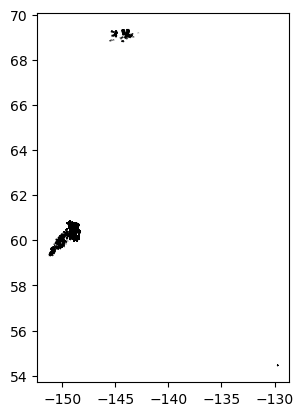

In [43]:
df_ref.plot(edgecolor='k');

We have found the problem! Reported here: https://github.com/GLIMS-RGI/glims_issue_tracker/issues/5

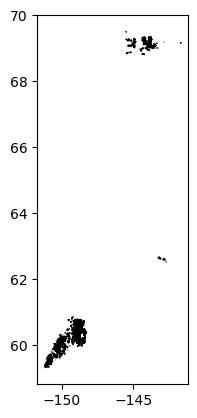

In [44]:
pb_rgi7.buffer(0).plot(edgecolor='k');

In [45]:
# Output directories
output_dir = mkdir(os.path.join(data_dir, 'l3_problem_glaciers'))
output_dir_tar = mkdir(os.path.join(data_dir, 'l3_problem_glaciers_tar'))

In [46]:
dd = mkdir(f'{output_dir}/RGI{reg:02d}/', reset=True)

print('Writing...')
rgi6.loc[rgi6.RGIId.isin(['RGI60-01.20630', 'RGI60-01.25912', 'RGI60-01.25913'])].to_file(dd + f'RGI{reg:02d}_ref.shp')

print('Taring...')
print(subprocess.run(['tar', '-zcvf', f'{output_dir_tar}/RGI{reg:02d}.tar.gz', '-C', output_dir, f'RGI{reg:02d}']))

Writing...
Taring...
RGI01/
RGI01/RGI01_ref.shx
RGI01/RGI01_ref.prj
RGI01/RGI01_ref.cpg
RGI01/RGI01_ref.dbf
RGI01/RGI01_ref.shp
CompletedProcess(args=['tar', '-zcvf', '../../rgi7_data/l3_problem_glaciers_tar/RGI01.tar.gz', '-C', '../../rgi7_data/l3_problem_glaciers', 'RGI01'], returncode=0)
